In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def dist(*vec):
    return np.sqrt(vec[0]**2 + vec[1]**2 + vec[2]**2)

def cartesian(*dims):
    return np.array(np.meshgrid(*dims, indexing='ij')).T.reshape(-1, len(dims))

## Point Scatterer

Let the incident field be:

$\vec{E}_{inc} = E_0 \,\hat{x}$ 
The scattered field has the form:

$\begin{pmatrix}E_{\parallel s} \\ E_{\perp s} \end{pmatrix} = \frac{e^{i k (r-z)}}{- i k r }\begin{pmatrix} S_2 & S_3\\S_4 & S_1\end{pmatrix} \begin{pmatrix}E_{\parallel inc} \\ E_{\perp inc} \end{pmatrix}$

 

The reference wave propagates in the negative $z$ direction:

\begin{align}
    \vec{E}_{ref}(x) &= E_{ref} \,e^{i k z} \,(-\hat{z})\\
    &= E_{ref} \,e^{-i k z} \,\hat{z}
\end{align}

At the hologram, $z = 0$, so we have $\vec{E}_{ref}(z) = E_{ref} \,\hat{z}$, a simple DC shift (that will be subtracted off.)

The scattered wave electric field is given by 

$$\vec{E}_{sc}(x, y, z) = E_{sc} \,\frac{e^{i k r}}{r} \,\hat{r},$$

where $\vec{r}$ is the displacement vector from the scatterer. For any scatterer, $z \equiv \vec{r} \cdot \hat{z}$ is fixed for every point in the hologram, while $x$ and $y$ vary by point. It is important to distinguish this $z$ from the $z = 0$ that is the location of the points on the hologram.

Note that with this definition, the real amplitudes $E_{ref}$ and $E_{sc}$ do not have the same dimensions!

Now the interference pattern at the screen is given by

\begin{align}
    I(x , y, z=0) = \left|\vec{E}_{ref} + \vec{E}_{sc}\right|^2
    &= \left(\vec{E}_{ref} + \vec{E}_{sc}\right) \left(\vec{E}_{ref} + \vec{E}_{sc}\right)^*\\
    &= \left|\vec{E}_{ref}\right|^2 + \left|\vec{E}_{sc}\right|^2 + \vec{E}_{ref} \cdot \vec{E}_{sc}^* + \vec{E}_{sc} \cdot \vec{E}_{ref}^*\\
    & = E_{ref}^2 + \frac{E_{sc}^2}{r^2} + \frac{E_{ref}E_{sc}}{r}\,e^{i k r}\,(\hat{r}\cdot\hat{z}) + \frac{E_{ref}E_{sc}}{r}\,e^{-i k r}\,(\hat{r}\cdot\hat{z})\\
    H(x, y) = \\
    H(x, y) = \frac{I(x , y, z=0) - E_{ref}^2}{E_{sc}^2} &= \frac{1}{r^2} + \frac{E_{ref}}{E_{sc}}\frac{z}{r^2}(2 \cos{k r})\\
    &= \frac{1}{r^2}\left(1 + 2\, z\, \frac{E_{ref}}{E_{sc}} \,\cos{k r}\right)
\end{align}

where we have used

\begin{align}
    \vec{r} &= x \hat{x} + y \hat{y} + z \hat{z}\\
    \hat{r} &\equiv \frac{\vec{r}}{r}\\
    \implies\hat{r} \cdot \hat{z}  &= \frac{z}{r}.
\end{align}

The second term in the brackets is indeed dimensionless since $E_{sc}$ has an extra factor of length.


In [4]:
def point_holo(position, center, k, n):
    #n is amp_incident/amp_scat
    #r = dist(*(position-center).T) # Theano objects cannot be automatically iterated over with the * operator
    temp = (position-center).T
    r  = dist(temp[0], temp[1], temp[2])
    z = center[2]
    return 1/r**2 * (1 + 2*z*n*np.cos(k*r))

## Rayleigh scattering



In [5]:
def rayleigh_holo(position, center, k, e_r, radius):
    r = (position-center).T
    r = dist(r[0], r[1], r[2])
    z = center[2]
    c = (e_r-1) / (e_r+2) * k**2 * radius**3 / r
    return 2*(1-(z/r)**2)*c*np.cos(k*r) + (1-(z/r)**2)*c**2 #+ 1

## Rayleigh-Gans Approximation to Sphere

$\begin{pmatrix}E_{\parallel s} \\ E_{\perp s} \end{pmatrix} = \frac{e^{i k (r-z)}}{- i k r }\begin{pmatrix} S_2 & 0\\0 & S_1\end{pmatrix} \begin{pmatrix}E_{\parallel i} \\ E_{\perp i} \end{pmatrix}$

For a sphere, the scattering coefficients are 
$\begin{pmatrix}S_1 \\ S_2\end{pmatrix} = i k^3 a^3 (m-1) \frac{2}{3} G(u)\begin{pmatrix}1 \\ \cos\theta\end{pmatrix}$

$G(u) = \left( \frac{9 \pi}{2 u^3}\right)^{1/2}J_{3/2}(u) = \frac{3}{u^3}(\sin u - u \cos u)$ 
Also, here $u = 2 x \sin \frac{\theta}{2}$ where $x = k a$ is the size parameter for incident wavevector k and sphere radius a

Define choose the incident field as

$E_{\parallel i} = E_0$

$E_{\perp i} = 0$

So that we have :

$E_{\parallel s} = \frac{e^{i k (r-z)}}{- i k r }S_2 E_{\parallel i}$

$E_{\perp s} = 0$

More simply,

$$\vec{E}_i = E_0 \hat{z}$$

$$\vec{E}_s =  E_0 \frac{e^{i k (r-z)}}{- i k r } S_2(\theta) \hat{z}$$


\begin{align}
    I &= \left|\vec{E}_{i} + \vec{E}_{s}\right|^2 \\
    &= \left(\vec{E}_{i} + \vec{E}_{s}\right) \left(\vec{E}_{i} + \vec{E}_{s}\right)^*\\
    &= \left|\vec{E}_{i}\right|^2 + \left|\vec{E}_{s}\right|^2 + \vec{E}_{i} \cdot \vec{E}_{s}^* + \vec{E}_{s} 
        \cdot \vec{E}_{i}^*\\
    &= \left|\vec{E}_{i}\right|^2 + \left|\vec{E}_{s}\right|^2 + 2 \,\mathrm{Re}\left(\vec{E}_{i} \cdot \vec{E}_{s}^*\right)
\end{align}

$\left|\vec{E}_{i}\right|^2 = E_0^2$

$\left|\vec{E}_{s}\right|^2 = \frac{E_0^2}{k^2 r^2}\left|S_2(\theta)\right|^2$

\begin{align}
    2 \,\mathrm{Re} \left( \vec{E}_{i} \cdot \vec{E}_{s}^*\right) &= 2 \frac{E_0^2}{kr} \,\mathrm{Re} \left( -i e^{i k (r-z)} S_2^* \right)\\
    &= 2 \frac{E_0^2}{kr} \,\mathrm{Re} \left( e^{-i \frac{\pi}{2}} e^{i k (r-z)} \left|S_2\right| e^{-i \delta}\right)\\
   &= 2 \frac{E_0^2}{kr} \,\mathrm{Re} \left( \exp(i )\right)
\end{align}

In [13]:
def rayleigh_gans_sphere_holo(position, k, center, m, a):
    r = (position-center).T
    r = dist(r[0], r[1], r[2])
    
    z = center[2]
    theta = np.arccos(z/r)
    
    V = 4/3*np.pi*a**3
    
    x = k*a
    u = 2*x*np.sin(.5*theta)
    G = 3 / u**3 * (np.sin(u) - u * np.cos(u))
    
    re_m, im_m = m[0], m[1]
    
    S2_mag = k**3 * a**3 * np.sqrt(re_m*re_m + im_m*im_m - 2*re_m + 1) * 2/3 * np.cos(theta) * G
    #S2_phase = np.arctan2(re_m - 1, im_m)
    S2_phase = np.arctan((re_m - 1)/im_m)
    
    holo_scatt = (1/(k*r)*S2_mag)**2
    holo_inter = 2 * 1/(k*r) * S2_mag * np.sin(k*(r-z) + S2_phase)
    
    # Techinically, the full pattern would have a term that would go as the intensity of the incident wave
    # but here I am subtracting it off this uninteresting DC term (for precision).
    holo_full = holo_scatt + holo_inter  #+ 1 
    
    return holo_full

Test holograms:

In [10]:
resolution = 256
x = y = np.linspace(0, 10, resolution)
z = 0

grid = cartesian(x, y, z)

wavelength = 1.0
wavevector = 2*np.pi/wavelength
radius = wavelength*1
center = np.array([5, 5, 2])
index = np.array([1.10, 0])

holo finished in 0.01562


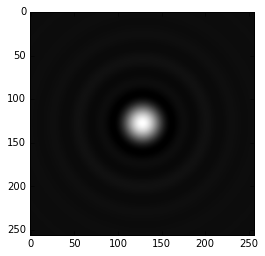

In [11]:
t0 = time.time()
#testholo = np.array([point_holo(point, center, wavevector, *amps) for point in grid]).reshape((resolution,resolution))
#testholo = point_holo(grid, center, wavevector, perm).reshape(resolution, resolution)
test_holo = rayleigh_gans_sphere_holo(grid, center, wavevector, index, radius).reshape(resolution, resolution)
print("holo finished in {:.4}".format(time.time()-t0))

#t1 = time.time()
#testholo2 = point_holo2(xx, yy, center, wavevector, *amps)
#print("point_holo2 finished in {:.3}".format(time.time()-t1))

#np.testing.assert_allclose(testholo, testholo2)
plt.gray()
#plt.subplot(1, 2, 1)
plt.imshow(test_holo)
#plt.subplot(1, 2, 2)
#plt.imshow(testholo2)
plt.show()